In [49]:
from konlpy.tag import Hannanum
from konlpy.utils import pprint
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, timedelta

In [50]:
#pip install konlpy

In [51]:
#pip install beautifulsoup4

## 주가 읽기

In [234]:
import pandas as pd
stock = pd.read_csv("F:/news/newss/sk하이닉스.csv")

In [131]:
stock

date       종가       오픈       고가       저가    거래량     per
0     2021-05-14  118,500  118,500  120,000  118,000  3.18M   0.85%
1     2021-05-13  117,500  116,500  118,500  115,500  0.08K  -1.67%
2     2021-05-12  119,500  123,500  123,500  119,000  0.45K  -2.85%
3     2021-05-11  123,000  127,000  127,500  122,000  2.65K  -5.38%
4     2021-05-10  130,000  131,000  131,000  128,500  0.36K   0.39%
...          ...      ...      ...      ...      ...    ...     ...
1279  2017-01-05   46,950   47,000   47,500   46,850  2.37M   0.97%
1280  2017-01-04   46,500   47,000   47,150   46,200  2.63M  -1.59%
1281  2017-01-03   47,250   46,200   47,300   46,200  2.65M   3.17%
1282  2017-01-02   45,800   44,750   46,000   44,600  1.54M   2.46%
1283  2017-01-01   44,700   44,700   44,700   44,700  0.22K   0.00%

[1284 rows x 7 columns]

In [132]:
persent = stock['per']
d = stock['date']
d

0       2021-05-14
1       2021-05-13
2       2021-05-12
3       2021-05-11
4       2021-05-10
           ...    
1279    2017-01-05
1280    2017-01-04
1281    2017-01-03
1282    2017-01-02
1283    2017-01-01
Name: date, Length: 1284, dtype: object

In [235]:
date=[]
# for i in range(len(stock['date'])):
#     date.append(stock['date'][i][:10])
persent=pd.DataFrame(stock['per'])
# date=pd.DataFrame(date,columns=['date'])
stock['date'] = pd.to_datetime(stock['date'], format ='%Y-%m-%d')
# print(stock['date'])
#stock['date']= pd.Timestamp(stock['date'])
# date=pd.DataFrame(date,columns=['date'])
#stockdata = pd.concat([stock['date'],stock['per']], axis=1)
#stockdata['date'] =pd.to_datetime(stockdata['date'], format ='%Y-%m-%d')
#len(stockdata)
#stockdata['per'] = persent
for i in range(len(stock)):
    stock['per'][i]=(float(stock['per'][i].replace("%",""))/100)

<ipython-input-235-f8bbc0245a38>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['per'][i]=(float(stock['per'][i].replace("%",""))/100)


In [231]:
stock['per']

0       0.0085
1      -0.0167
2      -0.0285
3      -0.0538
4       0.0039
         ...  
1279    0.0097
1280   -0.0159
1281    0.0317
1282    0.0246
1283         0
Name: per, Length: 1284, dtype: object

In [224]:
float(stock['per'][1].replace("%",""))/100

-0.0167

# 뉴스 url읽기

In [244]:
# import datetime
url = pd.read_csv("F:/news/newss/crawling_news2.txt", header = None, names = ["date","href"])
#url = pd.DataFrame(url)
url['per']= "A"

for i in range(len(url)):
    url['date'][i] = url['date'][i][:8]
    #url['date'][i] = pd.DatetimeIndex(url['date'][i])
    url['date'][i] = pd.to_datetime(url['date'][i], format ='%y.%m.%d')
    url['date'][i] = pd.Timestamp(url['date'][i]).date()
    #url['date'][i] = datetime.datetime.strptime(url['date'][i],'%y.%m.%d')
#     if url['date'][i].weekday() == 5: #주말이면 다음 주 월요일 날짜를 바꾼다
#         url['date'][i]=url['date'][i]+datetime.timedelta(days=2)
#     if url['date'][i].weekday() == 6:
#         url['date'][i]=url['date'][i]+datetime.timedelta(days=1)
    while url['date'][i] not in list(stock['date']):
#         url['date'][i]=pd.DatetimeIndex(url['date'][i])+timedelta(days=1)
        url['date'][i]=url['date'][i]+timedelta(days=1)
    for j in range(len(stock)):
        if url['date'][i] == stock['date'][j]:
            url['per'][i] = stock['per'][j-1] #다음날 주가

url

date                                               href     per
0    2021-05-06   https://www.mbn.co.kr/pages/news/newsView.php...  0.0039
1    2021-05-06   https://www.mbn.co.kr/pages/news/newsView.php...  0.0039
2    2021-05-05   https://www.mbn.co.kr/pages/news/newsView.php... -0.0227
3    2021-05-04   https://www.mbn.co.kr/pages/news/newsView.php...       0
4    2021-05-04   https://www.mbn.co.kr/pages/news/newsView.php...       0
..          ...                                                ...     ...
445  2019-03-15   https://www.mbn.co.kr/pages/news/newsView.php... -0.0044
446  2019-03-15   https://www.mbn.co.kr/pages/news/newsView.php... -0.0044
447  2019-03-14   https://www.mbn.co.kr/pages/news/newsView.php...  0.0119
448  2019-03-14   https://www.mbn.co.kr/pages/news/newsView.php...  0.0119
449  2019-03-14   https://www.mbn.co.kr/pages/news/newsView.php...  0.0119

[450 rows x 3 columns]

In [239]:
#완료시 삭제
f=open("F:/news/newss/per.txt",'w')
for i in range(len(url)):
    f.write(str(url['date'][i]))
    f.write("  "+str(url['per'][i])
    f.write("\n")
f.close()

SyntaxError: invalid syntax (<ipython-input-239-7dacd527d75e>, line 6)

In [248]:
te4 = pd.DataFrame(url)
te4 =te4.drop_duplicates(["date"])
q1 = te4["per"].quantile(.25)
q3 = te4["per"].quantile(.75)
for i in range(len(url)):
    if url['per'][i] > q3:
        url['per'][i] = 1
    elif url['per'][i] <= q3 and url['per'][i]>0:
        url['per'][i] = 2
    elif url['per'][i] <= 0 and url['per'][i]>q1:
        url['per'][i] = 3
    else:
        url['per'][i] = 4

In [249]:
url['per']

0      2
1      2
2      4
3      3
4      3
      ..
445    3
446    3
447    2
448    2
449    2
Name: per, Length: 450, dtype: object

In [203]:
#float(te4["per"][1])
te4["per"]

0       0.39%
2      -2.27%
3       0.00%
5       0.38%
10     -2.17%
        ...  
435    -0.25%
438     0.88%
440     0.29%
442    -0.44%
447     1.19%
Name: per, Length: 79, dtype: object

In [131]:
#test와 train데이터 분리
from sklearn.model_selection import train_test_split
train, test = train_test_split(url, test_size= 0.2, random_state=1234)

In [146]:
#인덱스 초기화
train = train.reset_index()
test = test.reset_index()

In [219]:
print(len(train))

360


# 전처리 및 토큰화

In [168]:
import requests
import urllib.request
import urllib.parse
from urllib.request import urlopen
from bs4 import BeautifulSoup
train

index                 date  \
0      141  2020-01-03 00:00:00   
1      389  2019-06-21 00:00:00   
2      438  2019-04-15 00:00:00   
3      433  2019-04-17 00:00:00   
4      229  2019-06-21 00:00:00   
..     ...                  ...   
355    204  2019-06-24 00:00:00   
356     53  2020-11-02 00:00:00   
357    294  2019-06-24 00:00:00   
358    211  2019-06-25 00:00:00   
359    303  2019-06-24 00:00:00   

                                                  href     per  
0     https://www.mbn.co.kr/pages/news/newsView.php...  -0.21%  
1     https://www.mbn.co.kr/pages/news/newsView.php...  -2.08%  
2     https://www.mbn.co.kr/pages/news/newsView.php...   2.05%  
3     https://www.mbn.co.kr/pages/news/newsView.php...  -0.25%  
4     https://www.mbn.co.kr/pages/news/newsView.php...  -2.08%  
..                                                 ...     ...  
355   https://www.mbn.co.kr/pages/news/newsView.php...   1.52%  
356   https://www.mbn.co.kr/pages/news/newsView.php...  -0.38%  
357   https://www.mbn.co.kr/pages/news/newsView.php...   1.52%  
358   https://www.mbn.co.kr/pages/news/newsView.php...  -0.30%  
359   https://www.mbn.co.kr/pages/news/newsView.php...   1.52%  

[360 rows x 4 columns]

In [207]:
def morpheme(data):
    news_group_date=[]
    news_group_content=[]
    news_group=[]
    j=0
    for i in range(len(data)):
        webpage = requests.get(data['href'][i])
        soup = BeautifulSoup(webpage.content, "html.parser")
        soup = soup.select_one('#newsViewArea').get_text()
        #print(soup)
        sup = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z ]', '', soup)
        if i == 0 :
            news_group_date = data['date'][i]
            news_group_content = soup
            news_group = pd.DataFrame([news_group_date,news_group_content,data['per'][i]],['date','content','per']).transpose()
            continue
        if news_group['date'][j] == data['date'][i]:
            news_group['content'][j] = news_group['content'][j] + soup
        else :
            j = j + 1
            a = {'date':data['date'][i],'content':soup,'per':data['per'][i]}
            news_group = news_group.append(a,ignore_index=True)
    return news_group

In [208]:
train_data=morpheme(train)

<ipython-input-207-886c58a489d3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_group['content'][j] = news_group['content'][j] + soup


# 전체 뉴스 토큰화 

In [209]:
tokken = []
i=0
hannanum=Hannanum()
for i in range(len(train_data)):
    #print(total_data.news.values[i])
    #print(hannanum.nouns(total_data.news.values[i]))
    #print(hannanum.morphs(total_data.news.values[i]))
    tokken.append(hannanum.pos(train_data['content'][i]))
    
tokken

[[('이재갑', 'N'),
  ('고용노동부', 'N'),
  ('장관', 'N'),
  ('이', 'J'),
  ('오늘(3일)', 'N'),
  ('오전', 'N'),
  ('삼성전자', 'N'),
  ('를', 'J'),
  ('포함', 'N'),
  ('하', 'X'),
  ('ㄴ', 'E'),
  ('7개', 'N'),
  ('제조업', 'N'),
  ('분야', 'N'),
  ('대기업', 'N'),
  ('임원들', 'N'),
  ('과', 'J'),
  ('간담회', 'N'),
  ('를', 'J'),
  ('개최', 'N'),
  ('하', 'X'),
  ('어', 'E'),
  ('산업안전보건법(산안법)', 'N'),
  ('주요', 'N'),
  ('내용', 'N'),
  ('을', 'J'),
  ('설명', 'N'),
  ('하', 'X'),
  ('ㅂ니다', 'E'),
  ('.', 'S'),
  ('이', 'M'),
  ('자리', 'N'),
  ('에는', 'J'),
  ('이', 'M'),
  ('장관', 'N'),
  ('과', 'J'),
  ('노동부', 'N'),
  ('주요', 'N'),
  ('간부', 'N'),
  (',', 'S'),
  ('삼성전자', 'N'),
  (',', 'S'),
  ('삼성디스플레이', 'N'),
  (',', 'S'),
  ('현대제철', 'N'),
  (',', 'S'),
  ('LG디스플레이,', 'N'),
  ('SK하이닉스,', 'N'),
  ('포스코,', 'N'),
  ('LG', 'F'),
  ('화학', 'N'),
  ('등', 'N'),
  ('의', 'J'),
  ('임원들', 'N'),
  ('이', 'J'),
  ('참석', 'N'),
  ('하', 'X'),
  ('ㅂ니다', 'E'),
  ('.', 'S'),
  ('일명', 'N'),
  ("'김용균법'", 'N'),
  ('으로', 'J'),
  ('불리', 'P'),
  ('는', 'E'),
  ('이번', '

##
### 토큰 중 가장 긴 토큰을 기준으로 반복 및 형태소 중 명사 동사 선택

In [210]:
lenA = []
for i in range(len(tokken)):
    lenA.append(len(tokken[i]))
max(lenA)

all_tokken=[]
Stopword = pd.read_csv("F:/news/newss/한국어불용어100.txt", header=None, names=['text','x','num'],delimiter = '\t')
for i in range(len(tokken)):
    for j in range(lenA[i]):
        # or len(tokken[i][j][0]) != 1
        if (tokken[i][j][1] == 'N' or tokken[i][j][1] == 'V') and tokken[i][j][0] not in Stopword['text'].values:
            all_tokken.append(tokken[i][j][0])

In [211]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_tokken)

vocab_size = 1000  # 상위 1000개 단어만 사용
tokenizer = Tokenizer(num_words = vocab_size + 1)
tokenizer.fit_on_texts(all_tokken)

# print(tokenizer.word_index) #인덱스가 어떻게 부여됬는지(입력된 단어 순서)
# print(tokenizer.word_counts) #상위 몇개 단어를 했을 때 어떻게 부여됬는지(입력된 단어 순서)


In [212]:
print(tokenizer.word_counts)

OrderedDict([('이재갑', 1), ('고용노동부', 1), ('장관', 8), ('오늘', 73), ('3일', 20), ('오전', 105), ('삼성전자', 775), ('포함', 91), ('7개', 39), ('제조업', 30), ('분야', 42), ('대기업', 22), ('임원들', 4), ('간담회', 2), ('개최', 81), ('산업안전보건법', 1), ('산안법', 3), ('주요', 151), ('내용', 46), ('설명', 88), ('자리', 7), ('노동부', 1), ('간부', 1), ('삼성디스플레이', 1), ('현대제철', 3), ('lg디스플레이', 1), ('sk하이닉스', 463), ('포스코', 46), ('화학', 273), ('참석', 11), ('일명', 1), ("'김용균법'", 1), ('이번', 108), ('작년', 94), ('12월', 21), ('충남', 3), ('태', 1), ('화력발전소', 1), ('하청', 3), ('노동자', 3), ('고', 1), ('故', 1), ('김용균', 1), ('사망', 1), ('사고', 1), ('계기', 48), ('전면', 2), ('개정', 4), ('법안', 7), ('무분별한', 1), ('위험', 5), ('외주화', 2), ('산업재해', 1), ('원청', 4), ('사업주', 1), ('책', 3), ('강화', 23), ('사업주가', 1), ('범위', 3), ('사업장', 4), ('전체', 46), ('밖', 24), ('대통령령', 1), ('장소', 1), ('확대', 62), ('도금', 1), ('수은·납·카드뮴', 1), ('가공', 1), ('작업', 6), ('사내', 2), ('하도급', 1), ('원칙적', 1), ('금지', 295), ('display', 346), ("'google", 346), ('dfp', 346), ('mc', 346), ('250x250', 5), ('보호', 5), ('사

## navermovie test-----------------

In [213]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(all_tokken)
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

#단어수가 2개인 단어의 빈도가 6.1%라 유의미한 영향을 줄 수 있어 제외하지 않는다

단어 집합(vocabulary)의 크기 : 8737
등장 빈도가 1번 이하인 희귀 단어의 수: 4792
단어 집합에서 희귀 단어의 비율: 54.84720155659838
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.133602979763718


In [214]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3946


## 앞의 형태소분석을 붙여씀
### 불필요하게 주가를 넣는 부분이 있고 href에서 본문을 따오는 부분 함수화 고려

In [181]:
def morpheme(data):
    news_group_date=[]
    news_group_content=[]
    news_group=[]
    j=0
    for i in range(len(data)):
        webpage = requests.get(data['href'][i])
        soup = BeautifulSoup(webpage.content, "html.parser")
        soup = soup.select_one('#newsViewArea').get_text()
        #print(soup)
        sup = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣A-Za-z ]', '', soup)
        if i == 0 :
            news_group_date = data['date'][i]
            news_group_content = soup
            news_group = pd.DataFrame([news_group_date,news_group_content,data['per'][i]],['date','content','per']).transpose()
            continue
        if news_group['date'][j] == data['date'][i]:
            news_group['content'][j] = news_group['content'][j] + soup
        else :
            j = j + 1
            a = {'date':data['date'][i],'content':soup,'per':data['per'][i]}
            news_group = news_group.append(a,ignore_index=True)
    return news_group

In [182]:
train_data = morpheme(train)
test_data = morpheme(test)

<ipython-input-181-886c58a489d3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_group['content'][j] = news_group['content'][j] + soup


In [216]:
#tokenizer = Tokenizer(vocab_size) 
#tokenizer.fit_on_texts(train_data['content'])
X_train = tokenizer.texts_to_sequences(train_data['content'])
X_test = tokenizer.texts_to_sequences(test_data['content'])

In [217]:
y_train = np.array(train_data['per'])
y_test = np.array(test_data['per'])

In [220]:

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

336
336


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## 패딩

In [236]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

뉴스의 최대 길이 : 409
뉴스의 평균 길이 : 104.98214285714286


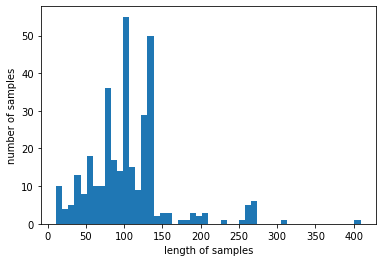

In [237]:
print('뉴스의 최대 길이 :',max(len(l) for l in X_train))
print('뉴스의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [238]:
max_len = 150
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 150 이하인 샘플의 비율: 91.07142857142857


In [239]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [240]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [241]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [242]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [243]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15


UnimplementedError:  Cast string to float is not supported
	 [[node binary_crossentropy/Cast (defined at <ipython-input-243-373d353988d6>:2) ]] [Op:__inference_train_function_3175]

Function call stack:
train_function


In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

#### 패딩( 인덱스 길이를 같게)

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoded = pad_sequences(tokenizer.texts_to_sequences(kkk))
print(encoded)

[[  0   0   0   0]
 [  0   0   0   0]
 [  0  16 417  16]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0  44]
 [  0   0   0  72]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 583]
 [  0   0   0   0]
 [  0   0 633 316]
 [  0 583 684  53]
 [  0   0   0   0]
 [  0   0   0  44]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0  16 180]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [417 391 552 173]
 [  0   0   0   0]
 [  0   0   1 593]
 [  0   0 753 963]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0 295]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0 181 601]
 [  0   0   0   0]
 [  0   0  16  16]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0  44]
 [  0   0   0   0]]


#### 개별 뉴스 정수화

In [42]:
kkk = []
with open("F:/news/newss/test_news.txt", "r",encoding="utf-8") as news_test:
    lines = news_test.readlines()
    for line in lines:
        kkk.append(line)

len(kkk)


41

In [37]:
print(tokenizer.texts_to_sequences(kkk)) #

[[], [], [16, 417, 16], [], [], [], [44], [72], [], [], [], [583], [], [633, 316], [583, 684, 53], [], [44], [], [], [16, 180], [], [], [], [417, 391, 552, 173], [], [1, 593], [753, 963], [], [], [], [295], [], [], [181, 601], [], [16, 16], [], [], [], [44], []]


#### counter 빈도 및 정수인코딩 
(당일 뉴스와 같은 입력에 대한 같은 크기의 인덱스로 만들기 어려움)

In [24]:
from collections import Counter
word_count = Counter(all_tokken)#빈도수 측정
word_count_1000 = word_count.most_common(1000)
print(word_count_1000)

[('코스피', 930), ('삼성전자', 894), ('미국', 752), ('이날', 698), ('종목', 632), ('미중', 574), ('상승', 552), ('대비', 503), ('기업', 493), ('반도체', 490), ('중국', 488), ('하락', 475), ('증시', 459), ('외국인', 443), ("display('google_dfp_MC_250x250');", 431), ('기록', 393), ('기관', 388), ('올해', 382), ('매일경제', 373), ('금지', 370), ('&', 367), ('무단전재', 365), ('재배포', 365), ('정상회담', 360), ('금리', 356), ('실적', 348), ('개인', 332), ('화학', 329), ('시장', 322), ('지수', 321), ('전망', 320), ('유가증권시장', 316), ('연구원', 308), ('시가총액', 294), ('[ⓒ', 293), ('코스닥', 286), ('가능성', 283), ('SK하이닉스', 281), ('트럼프', 279), ('상위', 278), ('기준금리', 273), ('일본', 271), ('이후', 261), ('대통령', 259), ('마감', 254), ('지난해', 248), ('영향', 244), ('가운데', 242), ('SK하이닉스,', 239), ('주가', 236), ('디지털뉴스국', 235), ('기자', 231), ('발표', 229), ('결과', 223), ('프로그램', 220), ('업종별', 220), ('연준', 215), ('2', 214), ('우위', 213), ('종목들', 212), ('1', 212), ('국내', 208), ('회복', 200), ('매매주체별', 199), ('전날', 199), ('수준', 196), ('0.', 190), ('한국', 189), ('네이버', 186), ('급등', 182), ('예상', 182), 

##### https://bab2min.tistory.com/544 한국어 불용어 리스트

#### 정수 인코딩

In [21]:
word_to_index = {}
i = 0
for (word, frequency) in word_count_1000 :
    i = i+1
    word_to_index[word] = i
print(word_to_index)

{'코스피': 1, '삼성전자': 2, '미국': 3, '이날': 4, '종목': 5, '미중': 6, '상승': 7, '대비': 8, '기업': 9, '반도체': 10, '중국': 11, '하락': 12, '증시': 13, '외국인': 14, "display('google_dfp_MC_250x250');": 15, '기록': 16, '기관': 17, '올해': 18, '매일경제': 19, '금지': 20, '&': 21, '무단전재': 22, '재배포': 23, '정상회담': 24, '금리': 25, '실적': 26, '개인': 27, '화학': 28, '시장': 29, '지수': 30, '전망': 31, '유가증권시장': 32, '연구원': 33, '시가총액': 34, '[ⓒ': 35, '코스닥': 36, '가능성': 37, 'SK하이닉스': 38, '트럼프': 39, '상위': 40, '기준금리': 41, '일본': 42, '이후': 43, '대통령': 44, '마감': 45, '지난해': 46, '영향': 47, '가운데': 48, 'SK하이닉스,': 49, '주가': 50, '디지털뉴스국': 51, '기자': 52, '발표': 53, '결과': 54, '프로그램': 55, '업종별': 56, '연준': 57, '2': 58, '우위': 59, '종목들': 60, '1': 61, '국내': 62, '회복': 63, '매매주체별': 64, '전날': 65, '수준': 66, '0.': 67, '한국': 68, '네이버': 69, '급등': 70, '예상': 71, '글로벌': 72, '4': 73, '반면': 74, '강세': 75, '대상': 76, '거래': 77, '수익률': 78, '일부': 79, '혼조세': 80, '현대차': 81, '협상': 82, '업종': 83, '완화': 84, '증가': 85, '경기': 86, '영업이익': 87, '외국': 88, '소송': 89, '출발': 90, '뉴욕증시': 91, '19일': 92, '상황'

 코스피가 글로벌 경기 호재에 힘입어 상승출발했다일 오전 시분 현재 코스피는 전일 대비 포인트 오른 를 기록하고 있다 이날 포인트 상승 출발한 지수는 글로벌 증시 상승과 함께 장 초반 선을 빠르게 회복하며 강보합세를 보이고 있다전일 뉴욕 증시는 새로운 이슈가 부재한 가운데 기술주가 상승을 주도했다 특히 월요일 엔비디아NVIDIA가 멜라녹스를 인수한 이후 데이터 서버 관련 대형 기술주가 상승세를 이어가고 있다 더불어 국제유가가 상승하는 등 위험자산 선호심리가 높아진 점도 영향을 주면서 상승세를 보였다서상영 키움증권 연구원은 경기둔화 우려가 완화된 점이 위험자산 선호심리를 높아져 국내 증시는 장 초반 상승세를 보일 것이라며 이후 오전 시께 중국의 월 경제지표 결과에 따라 변화를 모색할 것으로 전망했다 동시에 네마녀의 날쿼드러플 위칭데이을 맞은 가운데 선물옵션만기일임을 감안 외국인의 수급의 향방도 주목해야 한다고 덧붙였다이날 유가증권시장에서는 업종별로 대체로 상승세다 은행을 제외한 의료정밀 섬유의복 건설업 종이목재 기계 화학 등이 오름세다 매매주체별로 개인이 억원 순매수 중이다 외국인과 기관은 각각 억원 억원 순매도하고 있다 프로그램 매매는 억원 매수 우위를 보이고 있다시가총액 상위 종목들은 전반적으로 오르고 있다 삼성바이오로직스가 소폭 하락하고 있으나 삼성전자 SK하이닉스 현대차 셀트리온googletagdisplaygoogledfpMCx  LG화학 한국전력 POSCO NAVER LG생활건강 등이 내외 상승률을 보이고 있다이날 코스피시장에는 개 종목이 상승하고 있고 개 종목은 하락하고 있다코스닥은 전일 대비 포인트 오른 를 기록 중이다디지털뉴스국 김규리 기자 매일경제  mkcokr 무단전재 및 재배포 금지


In [30]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
n=kkma.nouns(newsa)
pprint(n)

['하이닉스',
 '올해',
 '회사채',
 '발행',
 '수요',
 '수요예측',
 '예측',
 '최대',
 '흥행',
 '2',
 '2조원',
 '조',
 '원',
 '이상',
 '자금',
 '시장',
 '흔들림',
 '입지',
 '확인',
 '나이스',
 '나이스신용평가',
 '신용',
 '평가',
 '등급',
 '전망',
 '부정적',
 '조정',
 '불안감',
 '투심',
 '견',
 '견조',
 '조',
 '잠정',
 '연간',
 '실적',
 '반등',
 '투자자',
 '관심',
 '반도체',
 '업',
 '업황',
 '황',
 '개선',
 '작년',
 '대비',
 '10',
 '10년',
 '년',
 '뿐',
 '7',
 '7년물',
 '물',
 '분포',
 '2조700억',
 '700',
 '억',
 '모집',
 '5',
 '5년물',
 '금리',
 '금리5일',
 '일',
 '투자',
 '투자은행',
 '은행',
 '업계',
 '공모채',
 '6000',
 '6000억원',
 '진행',
 '규모',
 '기관',
 '지금',
 '모집액',
 '액',
 '3',
 '3배',
 '배',
 '빅',
 '빅이슈어로',
 '이슈',
 '어로',
 '위상',
 '부각',
 '발행일',
 '13',
 '13일',
 '증권',
 '투자증권',
 '미래',
 '셋',
 '셋증권',
 '대표',
 '대표주관',
 '주관',
 '조달',
 '파트너',
 '역할',
 '지난해',
 '주관사',
 '사',
 '이름',
 '1',
 '1조원',
 '가량',
 '대규모',
 '만큼',
 '최고',
 '트렌치',
 '3년물',
 '2000',
 '2000억원',
 '800',
 '800억원',
 '10년물',
 '1200',
 '1200억원',
 '7800',
 '7800억원',
 '6700',
 '6700억원',
 '2900',
 '2900억원',
 '3300',
 '3300억원',
 '주문',
 '물량',
 '상대적',
 '평',
 '년',
 '평금리',
 '동일',
 

In [31]:
import pandas as pd
kunfile = pd.read_csv("D:\R_project\KnuSentiLex-master/SentiWord_Dict.txt", delimiter = '\t')
print(kunfile)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\R_project\\KnuSentiLex-master/SentiWord_Dict.txt'

In [ ]:
#tokens = [t for d in n for t in d[0]]
print(len(n))

In [ ]:
import nltk
text = nltk.Text(n, name='NMSC')
print(text)

In [ ]:
# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'c:/windows/fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [ ]:
pip install wheel
cd \
pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl